# **Kryptografia - generatory liczb losowych**



# Co to jest losowość?
<p>Losowość w kryptografii jest wszędzie: w tworzeniu tajnych kluczy, w szyfrowaniu a nawet w atakach na systemy kryptograficzne. Bez losowości, kryptografia byłaby niemożliwa, wszystkie działania byłyby detereministyczne, a więc nie byłyby bezpieczne. By lepiej zrozumieć zasady działania losowości, potrzebujemy dowiedzieć się, czym jest entropia. </p>
<p><strong>Entropia</strong> to w skrócie miara niepewności. Można ją traktować jako ilość niepewności co do wyników procesu losowego. Im większa entropia, tym mniejsza pewność wyników. </p>
<p> Mając rozkład prawdopodobieństwa p<sub>1</sub>, p<sub>2</sub>, p<sub>3</sub>, ..., p<sub>n</sub>, entropię możemy policzyć wyrażeniem:
<center><strong>-p<sub>1</sub> × log<sub>2</sub>(p<sub>1</sub>) - p<sub>2</sub> × log<sub>2</sub>(p<sub>2</sub>) - ... - p<sub>n</sub> × log<sub>2</sub>(p<sub>n</sub>)</strong></center></p>
<p>Mając ten wzór, możemy policzyć entropię uczciwego rzutu monetą:</p>
<p><center><strong> -½ × log<sub>2</sub>½ - (½) × log<sub>2</sub>½ = ½ + ½ = 1 bit</center></strong></p>
<p>Ale co jeśli moneta będzie niejednorodna? Powiedzmy, że prawdopodobieństwo dla reszki wynosi ¼, a dla orła ¾. Entropia takiego obciążonego rzutu jest równa:</p>
<p><center><strong>-(¾) × log<sub>2</sub>(¾) - (¼) × log<sub>2</sub>(¼)  ≈  -(¾) × (-0,415) - (¼) × (-2) ≈ 0,81 bitów</p></center></strong>
<p>Fakt, że 0,81 to entropia mniejsza niż 1-bitowa, dla uczciwego rzutu oznacza, że im bardziej moneta jest niesymetryczna, tym mniej równomierny jest rozkład i mniejsza entropia. </p>

# A po co nam ta wiedza?
<p>Aby systemy kryptograficzne były bezpieczne, potrzebujemy prawdziwej losowości, komponentu który ją zapewnia. Jak dokonać takiego losowego generowania? Potrzebujemy do tego:

*   Źródła niepewności lub źródła entropi, które zapewniajją nam generatory 
liczb losowych (RNG)
*   Algorytm kryptograficzny, który generuje bity losowe o dużej jakości ze źródła entropii, są to generatory liczb pseudolosowych (PRNG)
</p>

# Zacznijmy od tych pierwszych...
<p>Źródłem prawdziwej losowości są środowiska analogowe, chaotyczne, nieprzewidywalne i niedeterministyczne.</p>
<p>RNG są często składnikami oprogramowania lub sprzętu wykorzystującego entropię w świecie analogowym do wytwarzania prawdziwie losowych bitów. RNG niestety nie są zawsze dostępne, a ich entropia jest trudna do oszacowania. Najpopularniejsze przykłady RNG oparte na zjawiskach fizycznych:</p>

* Próbkowanie bitów z pomiarów temperatury sprzętu
* Szumu akustycznego
* Szumu atmosferycznego (tak działa np. popularna strona random.org)
* Elektryczności statycznej
* Diody Zenera
* Szum radiowy
* Przesunięcie zegara

<p>Jak widzimy, najlepsze RNG pobiera próbki ze zjawisk losowych, ciężkich do przewidzenia i antycypowania oraz zjawisk trudno mierzalnych i niedeterministycznych.</p>
<p>RNG mogą również zbierać entropię w działającym systemie, czerpiąc dane z np.

* Różnych czujników w sprzęcie
* Procesów w systemie
* Wzorach ruchowych myszki i klawiatury
* Aktywności sieci

Najlepszą praktyką jest łączenie wielu tych zjawisk, zarówno fizycznych jak i tych zachodzących w systemie. Wtedy produkowane bity są prawdziwie losowe, a co ważne, ciężkie do przewidzenia przez potencjalnych atakujących. </p>

<p>Niestety, główną wadą RNG jest to, że są bardzo wolne. W czasach, gdzie przesyłane są petabajty danych dziennie, algorytmy oparte tylko na RNG byłby za wolne.
Tu z pomocą pojawiają się PRNG. Są one oparte na generatorach RNG, lecz działają inaczej: RNG tworzą prawdziwe bity losowe dość wolno i ze źródeł analogowych, a PRNG tworzą długi strumień wiarygodnych bitów pseudolosowych w oparciu o kilka niepewnych bitów losowych uzyskanych z RNG.</p>

# Jak działa generator PRNG?
<p>Generator PRNG otrzymuje w regularnych odstępach losowe bity z RNG i używa ich do zaktualizowania dużego bufora pamięci, zwanego inaczej pulą entropii. Ta właśnie pula jest źródłem entropii dla generatora PRNG. Gdy PRNG aktualizuje pulę entropii, miesza ze sobą bity puli by usunąć obciążenia statystyczne.
By PRNG był w stanie generować bity pseudolosowe, korzysta on z deterministycznego algorytmu generowania bitów losowych, który rozciąga bity z puli entropii w dłuższe sekwencje. 
Zdziwić może to, że algorytm ten jest deterministyczny, czyli dla danego wejścia wynik będzie zawsze taki sam. Czy więc nie przeczy to całej idei generatorów liczb losowych?
Otóż nie, ponieważ to PRNG dba, by nigdy nie dawać algorytmowi tych samych wartości początkowych.</p>

<p>W toku swojej pracy PRNG wykonuje trzy następujące działania:

* <strong>init()</strong> – inicjalizuje pulę entropii i wewnętrzny stan PRNG.
* <strong>refresh(R)</strong> – aktualizuję pulę entropii za pomocą pewnej danej R, zwykle uzyskanej z RNG,
* <strong>next(N)</strong> – zwraca N pseudolosowe bity i aktualizuje pulę entropii.


<strong>refresh(R)</strong> jest inaczej zwane wprowadzeniem nowego ziarna , a jego argument R jest zwany ziarnem.
By PRNG były bezpieczne, muszą gwarantować odporność na analizę wsteczną i odporność na przewidywanie. Odporność na analizę wsteczną oznacza, że wcześniej wygenerowanych bitów nie da się odtworzyć, natomiast odporność na przewidywanie oznacza, że przewidzenie przyszłych bitów musi być niemożliwe.</p>
<p>Kryptograficzne generatory PRNG możemy znaleźć w wielu 
systemach operacyjnych większości platform – od komputerów, 
przez routery aż po telefony komórkowe. Większość z nich są to generatory software’owe, lecz występują również generatory czysto sprzętowe.
Przyjrzyjmy się kilku z nich.</p>

# Generatory liczb w systemach Unixowych
<p>W systemach *nix plik /dev/urandom jest interfejsem pomiędzy użytkownikiem a generatorem PRNG i jest używany do generowania wiarygodnie losowych bitów. Ponieważ jest to plik urządzenia, żądanie losowych bitów jest przeprowadzane jako odczytanie go jako pliku.
Polecenie poniżej korzysta z /dev/urandom by zapisać 10MB losowych bitów w pliku. </p>

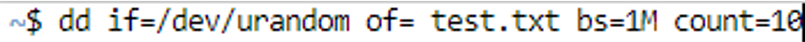

<p>Poniżej prezentujemy prosty kod w C, odczytujący losowe bity.
Korzystanie z takiego programu jest jednak niebezpieczne, nie sprawdza on bowiem wejścia open() oraz read(), co może powodować nieprawidłowości.
</p>

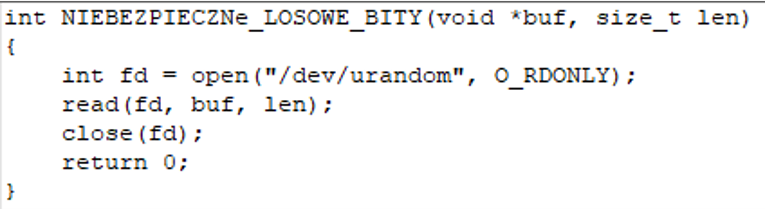

<p>Różne wersje Uniksów używają różnych generatorów PRNG. 
Najczęściej spotykaną metodą jest użycie funkcji skrótu SHA-1, która zamienia surowe bity entropii w wiarygodne bity pseudolosowe. PRNG bez przerwy zbiera entropię z różnych źródeł takich jak klawiatura, myszka, dyski oraz posiada podstawową pulę 512 bajtów.
To czym się różnią te dwa pliki to to, że /dev/urandom posiada dodatkowo pulę nieblokującą, a /dev/urandom pulę blokującą.

Co to znaczy?
</p><p>Można przyjąć że /dev/random próbuje (często nieprawidłowo) oszacować rozmiar entropii i odmawia zwracania bitów, gdy poziom entropii jest zbyt niski. 
Nie jest to dobry pomysł, ponieważ entropie jest bardzo ciężka do oszacowania, a ponadto kończy się ona bardzo szybko, co może powodować odmowę usług i spowolnić działanie aplikacji korzystających z PRNG.

W /dev/urandom takiego ograniczenia nie ma, dlatego jest on częściej używany.

/dev/random  tworzy więc więcej problemów niż ich rozwiązuje.
</p>









# Fortuna oraz CryptGenRandom() w Windowsie
<p>**Fortuna** to struktura PRNG wykorzystywana w systemie Windows, zaprojektowana w 2003 roku przez Nielsa Fergusona i Bruce'a Schneiera. Fortuna zastąpiła inny projekt Schneiera z 1998 roku, który nazywał się Yarrow, a obecnie jest używany w systemach macOS i iOS. Pamięć wewnętrzna Fortuny zawiera 32 pule entropii P<sub>1</sub>, P<sub>2</sub>, ..., P<sub>32</sub>, takie, że P<sub>i</sub> jest używana przy każdym nowym 2<sup>i</sup> ziarnie. Oprócz tego zawiera 16-bajtowe klucz *K* i licznik *C*, które tworzą stan wewnętrzny DRBG Fortuny.
<p>Mowiąc w uproszczeniu, Fortuna działa tak:


*   *init()* ustawia klucz K i licznik C na zero i opróżnia 32 pule entropii P<sub>i</sup>, gdzie i = 1, ..., 32
*   *refresh(R)* dołącza dane R do jednej z pul entropii, system natomiast wybiera generatory RNG używane do tworzenia wartości R i powinien regularnie wywoływać *refresh*
*   *next(N)* aktualizuje *K* przy użyciu danych z jednej lub większej liczby pul entropii, przy czym wybór pul entropii zależy głównie od tego, jak wiele aktualizacji *K* już zostało wykonanych - *N* żądanych bitów jest wtedy tworzone poprzez szyfrowanie *C* za pomocą klucza *K*. Jeśli szyfrowanie *C* nie wystarczy, Fortuna szyfruje *C + 1*, potem *C + 2* itd., aby otrzymać wystarczającą liczbę bitów. 


</p>
<p>Działania Fortuny na pierwszy rzut oka wydają się proste, ale prawidłowa implementacja jest trudna. Po pierwsze trzeba się dowiedzieć jak wybierane są pule entropii, jakiego szyfru używa *next()*, itd. Specyfikacja definiuje większość szczegółów, jednak nie dostarcza zestawu testów sprawdzających prawidłowość implementacji, więc algorytm jest trudny do zaimplementowania i działania zgodnie z oczekiwaniem. </p>

<p><strong>CryptGetRandom()</strong> jest interfejsem w obszarze użytkownika do generatora PRNG. PRNG systemu Windows bierze entropię ze sterownika trybu jądra cng.sys, którego kolektor entroipii jest luźno oparty właśnie na <strong>Fortunie</strong>.
Na ilustracji poniżej mamy przykładowe wywołanie funkcji CryptGetRandom() w C++ z wymaganą kontrolą.

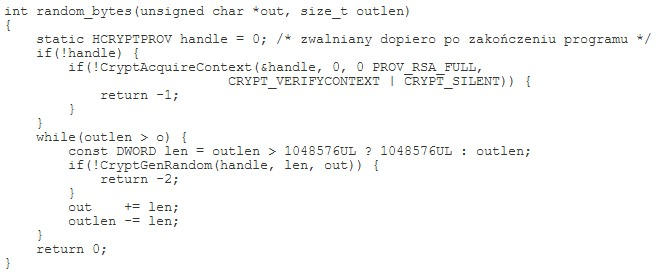</p>

Co możemy zauważyć na tej ilustracji - przed wywołaniem właściwego PRNG, musimy zadeklarować dostawcę usług kryptograficznych (HCRYPTPROV), a następnie uzyskać kontekst kryptograficzny (CryptAcquireContext(), co zwiększa prawdopodobieństwo, że coś może pójść źle. Dla przykładu, jedna z wersji oprogramowania do szyfrowania TrueCrypt wywołuje CryptAcquireContext() w sposób który może się niezauważenie nie powieść, prowadząc do suboptymalnej losowości. Na dzień dzisiejszy jednak mamy już nowszą wersję tego interfejsu, mianowicie BCryptGenRandom(), który jest dużo prostszy i nie wymaga kodu, by otworzyć obsługę. 
# RDRAND w procesorach intela
Intel Digital Random Number Generator jest sprzętowym generatorem PRNG, wprowadzonym w 2012 roku w mikroarchitekturze Ivy Bridge (czyli 3 generacji procesorów Intela), opartym na wytycznej NIST SP 800-90 ze standardem AES w trybie CTR_DRBG. Jest on dostępny poprzez instrukcję asemblera RDRAND, która oferuje interfejs niezależny od systemu operacyjnego i jest w zasadzie szybsza od programowych generatorów PRNG. Podczas gdy programistyczne PRNG próbują zbierać entropię z nieprzewidywalnych źródeł, RDRAND ma jedno źródło entropii, które dostarcza sekwencyjny strumień danych entropii w postaci zer i jedynek. W kategoriach inżynierii sprzętowej, źródłem entropii jest podwójny zatrzask różnicowy ze sprzężeniem zwrotnym, czyli mały obwód sprzętowy, który przełącza się z częstotliwością 800 MHz między 0 a 1, zależnie od wahań szumów cieplnych. Tego rodzaju urządzenia są zwykle dość niezawodne. 

Instrukcja RDRAND przyjmuje jako argument rejestr 16, 32 lub 64-bitowy i zapisuje wartość losową. Po wywołaniu, ustawia flagę przeniesienia na 1, jeśli dane ustawione w docelowym rejestrze są prawidłową wartością losową, a 0 w przeciwnym wypadku, co oznacza że pisząc w assemblerze, trzeba koniecznie sprawdzić flagę przeniesienia CF. 

PRNG Intela jest tylko częściowo udokumentowany, lecz jest zbudowany według znanych standardów i był sprawdzany przez poważne instytucje. Niemniej jednak, było kilka kłopotów z jego bezpieczeństwem, szczególnie po rewelacjach Snowdena dotyczących tylnych drzwi w kryptografii. Jeśli jednak mamy obawy, to możemy korzystać z RDRAND z innymi źródłami entropii - takie działanie uchroni nas przed wykorzystaniem hipotetycznych tylnych drzwi w sprzęcie Intela lub powiązanym z nim kodem.
# Algorytm Blum Blum Shub
<p>Algorytm Blum Blum Shub został poraz pierwszy opisany w pracy "A Simple Unpredictable Pseudo-Random Number Generator, „SIAM Journal on Computing” przez małżeństwo Leonore i Manuela Blum oraz Michaela Shub w maju 1986 roku. Algorytm wywodzi się z funkcji jednokierunkowej opracowanej przez Michaela Rabina. 
Blum Blum Shub jest generatorem liczb pseudolosowych, jednakże ze względu na swoje działanie ma spore zastosowanie w kryptografii. Jego bezpieczeństwo będzie wątpliwe, kiedy powstanie szybki i skuteczny algorytm do faktoryzacji liczb. </p>
<p>Wynika to z samej postaci generatora:</p>
<center><strong>x<sub>n+1</sub> = x<sub>n</sub><sup>2</sup> mod M</strong></center>
<p>Gdzie M = pq, które są iloczynami dwóch dużych liczb pierwszych, które przystają do 3mod4 (p=q=3(mod4), czyli liczby p i q przy dzieleniu przez 4 dają resztę 3), a x<sub>0</sub> to losowe ziarno.

Przykładowe wygenerowanie w Pythonie na małych liczbach:
p = 7, q = 11  (7/4 = 1 reszty 3, 11/4 = 2 reszty 3)
seed = 5
</p>


In [1]:
p=7
q=11
M=p*q
x0=5
x1=(x0**2)%M
x2=(x1**2)%M
x3=(x2**2)%M
x4=(x3**2)%M
print(x1,x2,x3,x4)

25 9 4 16


<p>Teraz czas na "poważniejszą" implementację i jej interpretację.

In [2]:
import sympy
import random
import sys


x = 3*10**10 #Mamy liczbę x = 30000000000
y = 4*10**10 #Mamy liczbę x = 40000000000
seed = random.randint(1,1e10) #Generujemy losową liczbę całkowitą między 1 a 10 000 000 000


def lcm(a, b): #Funkcja licząca najmniejszą wspólną wielokrotność liczb a i b
    return a * b / gcd(a, b)

def gcd(a,b): #Funkcja licząca największy wspólny dzielnik liczb a i b
    while b > 0:
        a, b = b, a % b
    return a

def next_usable_prime(x): #Funkcja wyznaczająca nasze "duże liczby pierwsze"
        p = sympy.nextprime(x) #Nasza liczba p będzie następną liczbą pierwszą po x
        while (p % 4 != 3): #Szukamy takiej liczby p, która dzielona przez 4 daje resztę 3 (pętla szuka kolejnych liczb pierwszych aż znajdzie taką, która przystaje do 3mod4)
            p = sympy.nextprime(p)
        return p

p = next_usable_prime(x) #Wywołujemy opisaną wyżej funkcję dla x
q = next_usable_prime(y) #Wywołujemy opisaną wyżej funkcję dla y
M = p*q

N = 1000 

#if (len(sys.argv)>1):   Tutaj jest funkcja, która umożliwiała zmianę N i wywołanie algorytmu z argumentem z linii poleceń,
#    N=int(sys.argv[1])  czyli finalnie wynikiem działania algorytmu o innej długości, ale w notebooku to nie zadziała, czyli u nas długość będzie zawsze 1000. 

print("\np:\t",p)
print("q:\t",q)

print("M:\t",M)
print("Seed:\t",seed)

x = seed

bit_output = ""
for _ in range(N): #Pętla przechodząca przez elementy od 0 do 1000
    x = x*x % M #Główna postać algorytmu (xn+1=xn^2(mod M))
    b = x % 2 #Obliczenie reszty z dzielenia przez 2 otrzymanej liczby (0 lub 1)
    bit_output += str(b)
print(bit_output) #Wypisanie wyniku

print("\nNumber of zeros:\t",bit_output.count("0"))

print("Number of ones:\t\t",bit_output.count("1"))





p:	 30000000091
q:	 40000000003
M:	 1200000003730000000273
Seed:	 7268954187
1101010111001101000101001000010111100100011000101011110001110110011111111010111010111110011101100011101100101110111000011001000001110011010010011000100111110111100101000101101101110110111001011110000110001000011101010010011010000011011110101111100011010110101110110010101101010010001010110010011111010000010101001000001011011010001011011010110111110101101001000001000011000111000010110000010000111111000010110010000001000011110100100011110111011010001010000100011011110001011100101110101010100001010100011010110000011011001000110110111011010110111110111010111101000110010010010010110010101001000011010101000100010010111010011101110110110011011111100111010100001101111100111000000010011011011010110110010000001101100111010000001011010110011010010110100111110011110011100001101010111111011100001011100000010101101001111111101011111000111001111111000110111100010001011111100011101010011101110111100010001011101110001000111000

Źródła:Nowoczesna kryptografia. Praktyczne wprowadzenie do szyfrowania,J.PAumasson<br>
Kryptografia. W teorii i praktyce, Douglas R. Stinson, WNT 2005.<br>
Kryptografia dla praktyków, Bruce Schneier, WNT 2002.
<br>https://pl.wikipedia.org/wiki/Generator_liczb_losowych
<br>https://www.naukowiec.org/kalkulatory/liczby-losowe.html
<br>http://home.agh.edu.pl/~chwiej/mn/generatory_16.pdf
<br>https://en.wikipedia.org/wiki/Random_number_generation
<br>https://en.wikipedia.org/wiki/Pseudorandom_number_generator